In [1]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# Import Data

In [2]:
# import data

import_data = 'data/Pitching.csv'
import_data2 = 'data/Salaries.csv'
import_data3 = 'data/Appearances.csv'


pitcher_df = pd.read_csv(import_data)

salary_df = pd.read_csv(import_data2)

appear_df = pd.read_csv(import_data3)

# Filter to 2010 - 2016

In [3]:
pitcher_2016 = pitcher_df[(pitcher_df['yearID'] == 2010) | 
                        (pitcher_df['yearID'] == 2011) |
                        (pitcher_df['yearID'] == 2012) |
                        (pitcher_df['yearID'] == 2013) |
                        (pitcher_df['yearID'] == 2014) |
                        (pitcher_df['yearID'] == 2015) |
                        (pitcher_df['yearID'] == 2016)] 

pitcher_2016

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
39749,aardsda01,2010,1,SEA,AL,0,6,53,0,0,...,5.0,2,2.0,0,202.0,43,19,7.0,1.0,5.0
39750,abadfe01,2010,1,HOU,NL,0,1,22,0,0,...,0.0,0,0.0,0,76.0,6,6,0.0,1.0,0.0
39751,accarje01,2010,1,TOR,AL,0,1,5,0,0,...,0.0,2,1.0,0,34.0,2,6,0.0,0.0,2.0
39752,aceveal01,2010,1,NYA,AL,3,0,10,0,0,...,1.0,0,1.0,0,53.0,2,5,0.0,0.0,0.0
39753,acostma01,2010,1,NYN,NL,3,2,41,0,0,...,1.0,3,0.0,0,157.0,12,13,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44962,zastrro01,2016,1,CHN,NL,1,0,8,1,0,...,0.0,0,1.0,0,66.0,1,3,0.0,2.0,1.0
44963,zieglbr01,2016,1,ARI,NL,2,3,36,0,0,...,5.0,0,2.0,0,165.0,30,13,1.0,1.0,10.0
44964,zieglbr01,2016,2,BOS,AL,2,4,33,0,0,...,2.0,1,1.0,0,124.0,12,8,1.0,0.0,6.0
44965,zimmejo02,2016,1,DET,AL,9,7,19,18,0,...,0.0,3,2.0,0,450.0,1,63,1.0,5.0,8.0


In [4]:
salary_2016 = salary_df[(salary_df['yearID'] == 2010) | 
                        (salary_df['yearID'] == 2011) |
                        (salary_df['yearID'] == 2012) |
                        (salary_df['yearID'] == 2013) |
                        (salary_df['yearID'] == 2014) |
                        (salary_df['yearID'] == 2015) |
                        (salary_df['yearID'] == 2016)] 

salary_2016

,yearID,teamID,lgID,playerID,salary
20624,2010,ARI,NL,abreuto01,407000
20625,2010,ARI,NL,boyerbl01,725000
20626,2010,ARI,NL,drewst01,3400000
20627,2010,ARI,NL,gutieju01,411000
20628,2010,ARI,NL,harenda01,8250000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [5]:
#appear_2016 = appear_df[appear_df['yearID'] == 2016] 

#appear_2016

In [6]:
# drop columns in appearance df

#appear_drop_columns = appear_2016.drop(['yearID','teamID','lgID','G_batting','G_defense','G_c','G_1b','G_2b','G_3b',
#                                        'G_ss','G_lf','G_cf','G_rf','G_of','G_dh','G_ph','G_pr'
                                       
#                                       ], axis = 1)

#appear_drop_columns


# Merge Datasets

In [7]:
# merge pitcher and salary datasets

merge_df = pd.merge(pitcher_2016, salary_2016, on="playerID", how="inner")
merge_df

,playerID,yearID_x,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,BFP,GF,R,SH,SF,GIDP,yearID_y,teamID_y,lgID_y,salary
0,aardsda01,2010,1,SEA,AL,0,6,53,0,0,...,202.0,43,19,7.0,1.0,5.0,2010,SEA,AL,2750000
1,aardsda01,2010,1,SEA,AL,0,6,53,0,0,...,202.0,43,19,7.0,1.0,5.0,2011,SEA,AL,4500000
2,aardsda01,2010,1,SEA,AL,0,6,53,0,0,...,202.0,43,19,7.0,1.0,5.0,2012,NYA,AL,500000
3,aardsda01,2012,1,NYA,AL,0,0,1,0,0,...,5.0,1,1,0.0,0.0,0.0,2010,SEA,AL,2750000
4,aardsda01,2012,1,NYA,AL,0,0,1,0,0,...,5.0,1,1,0.0,0.0,0.0,2011,SEA,AL,4500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,tejadru01,2016,1,SLN,NL,0,0,1,0,0,...,5.0,1,2,0.0,0.0,0.0,2013,NYN,NL,514701
16275,tejadru01,2016,1,SLN,NL,0,0,1,0,0,...,5.0,1,2,0.0,0.0,0.0,2014,NYN,NL,1100000
16276,tejadru01,2016,1,SLN,NL,0,0,1,0,0,...,5.0,1,2,0.0,0.0,0.0,2015,NYN,NL,1880000
16277,tejadru01,2016,1,SLN,NL,0,0,1,0,0,...,5.0,1,2,0.0,0.0,0.0,2016,SLN,NL,1500000


In [8]:
# merge with appearance dataset

#final_merge = pd.merge(merge_df, appear_drop_columns, on="playerID", how="outer")

#final_merge

In [9]:
# drop 'NA' rows (NA rows are hitters, we only want to look at pitchers)

#clean_data = final_merge.dropna()

#clean_data

In [10]:
# drop unwanted columns

na_df = merge_df.drop(['playerID','yearID_x','stint','teamID_x','lgID_x','yearID_y','teamID_y','lgID_y'], axis = 1)

na_df

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
0,0,6,53,0,0,0,31,149,33,19,...,2,2.0,0,202.0,43,19,7.0,1.0,5.0,2750000
1,0,6,53,0,0,0,31,149,33,19,...,2,2.0,0,202.0,43,19,7.0,1.0,5.0,4500000
2,0,6,53,0,0,0,31,149,33,19,...,2,2.0,0,202.0,43,19,7.0,1.0,5.0,500000
3,0,0,1,0,0,0,0,3,1,1,...,0,0.0,0,5.0,1,1,0.0,0.0,0.0,2750000
4,0,0,1,0,0,0,0,3,1,1,...,0,0.0,0,5.0,1,1,0.0,0.0,0.0,4500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,0,0,1,0,0,0,0,3,2,2,...,0,0.0,0,5.0,1,2,0.0,0.0,0.0,514701
16275,0,0,1,0,0,0,0,3,2,2,...,0,0.0,0,5.0,1,2,0.0,0.0,0.0,1100000
16276,0,0,1,0,0,0,0,3,2,2,...,0,0.0,0,5.0,1,2,0.0,0.0,0.0,1880000
16277,0,0,1,0,0,0,0,3,2,2,...,0,0.0,0,5.0,1,2,0.0,0.0,0.0,1500000


In [11]:
# drop 'NA' rows (13 rows were dropped)

df = na_df.dropna()

df

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
0,0,6,53,0,0,0,31,149,33,19,...,2,2.0,0,202.0,43,19,7.0,1.0,5.0,2750000
1,0,6,53,0,0,0,31,149,33,19,...,2,2.0,0,202.0,43,19,7.0,1.0,5.0,4500000
2,0,6,53,0,0,0,31,149,33,19,...,2,2.0,0,202.0,43,19,7.0,1.0,5.0,500000
3,0,0,1,0,0,0,0,3,1,1,...,0,0.0,0,5.0,1,1,0.0,0.0,0.0,2750000
4,0,0,1,0,0,0,0,3,1,1,...,0,0.0,0,5.0,1,1,0.0,0.0,0.0,4500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,0,0,1,0,0,0,0,3,2,2,...,0,0.0,0,5.0,1,2,0.0,0.0,0.0,514701
16275,0,0,1,0,0,0,0,3,2,2,...,0,0.0,0,5.0,1,2,0.0,0.0,0.0,1100000
16276,0,0,1,0,0,0,0,3,2,2,...,0,0.0,0,5.0,1,2,0.0,0.0,0.0,1880000
16277,0,0,1,0,0,0,0,3,2,2,...,0,0.0,0,5.0,1,2,0.0,0.0,0.0,1500000


In [12]:
# check columns

for col in df.columns:
    print(col)

W
L
G
GS
CG
SHO
SV
IPouts
H
ER
HR
BB
SO
BAOpp
ERA
IBB
WP
HBP
BK
BFP
GF
R
SH
SF
GIDP
salary


# Games started over 10

In [13]:
games_over_ten = df[df['GS'] >= 10] 

games_over_ten

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
200,7,6,19,19,0,0,0,337,112,35,...,4,7.0,2,470.0,0,41,3.0,2.0,12.0,410000
201,7,6,19,19,0,0,0,337,112,35,...,4,7.0,2,470.0,0,41,3.0,2.0,12.0,1250000
202,7,6,19,19,0,0,0,337,112,35,...,4,7.0,2,470.0,0,41,3.0,2.0,12.0,3250000
203,7,6,19,19,0,0,0,337,112,35,...,4,7.0,2,470.0,0,41,3.0,2.0,12.0,5750000
204,7,6,19,19,0,0,0,337,112,35,...,4,7.0,2,470.0,0,41,3.0,2.0,12.0,8000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16210,3,4,18,12,0,0,0,224,81,48,...,2,9.0,0,328.0,5,53,1.0,5.0,10.0,510500
16213,5,6,19,19,0,0,0,343,119,45,...,4,3.0,3,478.0,0,50,6.0,3.0,13.0,509500
16254,16,11,32,32,0,0,0,527,150,68,...,6,8.0,0,716.0,0,72,0.0,3.0,10.0,3125000
16263,9,10,35,20,1,0,0,440,187,93,...,10,7.0,0,662.0,8,99,0.0,4.0,20.0,507500


# Create Bins

In [14]:
#
df_salary = games_over_ten[['salary']]

#df_salary.style.format("{:.1f}")

new_df = df_salary.describe()

new_df

,salary
count,5.767000e+03
mean,6.440345e+06
std,6.497792e+06
min,4.000000e+05
25%,5.937500e+05
50%,4.250000e+06
75%,1.000000e+07
max,3.300000e+07


# 25% = 593,750
# 50% = 4,250,000
# 75% = 10,000,000
# Max = 33,000,000

In [15]:
#new_df.to_csv('data/salary_data.csv')

In [16]:
salary_bins = pd.cut(df.salary,bins=[0,593750,4250000,10000000,33000000],labels=['Low','Medium','High','Highest'])

salary_bins

0        Medium
1          High
2           Low
3        Medium
4          High
          ...  
16274       Low
16275    Medium
16276    Medium
16277    Medium
16278       Low
Name: salary, Length: 16266, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Highest']

In [17]:
games_over_ten.insert(26,'Salary_Group',salary_bins)


In [18]:
games_over_ten

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary,Salary_Group
200,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,410000,Low
201,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,1250000,Medium
202,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,3250000,Medium
203,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,5750000,High
204,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,8000000,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16210,3,4,18,12,0,0,0,224,81,48,...,9.0,0,328.0,5,53,1.0,5.0,10.0,510500,Low
16213,5,6,19,19,0,0,0,343,119,45,...,3.0,3,478.0,0,50,6.0,3.0,13.0,509500,Low
16254,16,11,32,32,0,0,0,527,150,68,...,8.0,0,716.0,0,72,0.0,3.0,10.0,3125000,Medium
16263,9,10,35,20,1,0,0,440,187,93,...,7.0,0,662.0,8,99,0.0,4.0,20.0,507500,Low


In [19]:
# check columns

for col in games_over_ten.columns:
    print(col)

W
L
G
GS
CG
SHO
SV
IPouts
H
ER
HR
BB
SO
BAOpp
ERA
IBB
WP
HBP
BK
BFP
GF
R
SH
SF
GIDP
salary
Salary_Group


# Random Forest

## Which pitching stats contribute to a higher salary?

In [20]:
target = games_over_ten["salary"]

In [21]:
data = games_over_ten.drop(['salary','Salary_Group','G','GS'], axis = 1)
feature_names = data.columns
data.head()

,W,L,CG,SHO,SV,IPouts,H,ER,HR,BB,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
200,7,6,0,0,0,337,112,35,6,22,...,2.0,4,7.0,2,470.0,0,41,3.0,2.0,12.0
201,7,6,0,0,0,337,112,35,6,22,...,2.0,4,7.0,2,470.0,0,41,3.0,2.0,12.0
202,7,6,0,0,0,337,112,35,6,22,...,2.0,4,7.0,2,470.0,0,41,3.0,2.0,12.0
203,7,6,0,0,0,337,112,35,6,22,...,2.0,4,7.0,2,470.0,0,41,3.0,2.0,12.0
204,7,6,0,0,0,337,112,35,6,22,...,2.0,4,7.0,2,470.0,0,41,3.0,2.0,12.0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.03536754507628294

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.056865464632454926

In [25]:
results_2 = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

results_2

[(0.06260802677616398, 'SO'),
 (0.060818255574373516, 'BB'),
 (0.05823702811787128, 'BAOpp'),
 (0.057821816548514905, 'ERA'),
 (0.055338574132691686, 'IPouts'),
 (0.05502171972095514, 'BFP'),
 (0.05350263804919773, 'HR'),
 (0.05345891230922163, 'H'),
 (0.052743906653755016, 'GIDP'),
 (0.05208225668548775, 'R'),
 (0.05111172021127542, 'ER'),
 (0.048172810408260165, 'WP'),
 (0.04786009676466736, 'HBP'),
 (0.04575863973293681, 'SH'),
 (0.045655320824765845, 'W'),
 (0.04490696325726511, 'L'),
 (0.042998194374385845, 'SF'),
 (0.037555239012524944, 'IBB'),
 (0.02096814195450706, 'CG'),
 (0.01967349961131252, 'BK'),
 (0.016227312681339187, 'GF'),
 (0.013663014386088112, 'SHO'),
 (0.0038159122124391247, 'SV')]

In [26]:
# create dataframe from results

ml_df_2 = pd.DataFrame(results_2, columns = ['result', 'stat'])
ml_df_2

,result,stat
0,0.062608,SO
1,0.060818,BB
2,0.058237,BAOpp
3,0.057822,ERA
4,0.055339,IPouts
5,0.055022,BFP
6,0.053503,HR
7,0.053459,H
8,0.052744,GIDP
9,0.052082,R


In [27]:
# export to csv

ml_df_2.to_csv("static/output_data/random_forest_pitchers_10.csv")

<AxesSubplot:>

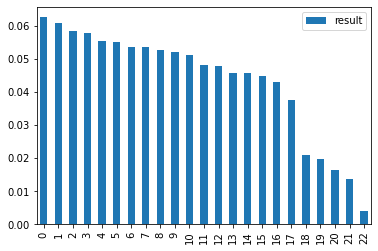

In [28]:
# plot data

ml_df_2.plot.bar()

## Create dataframe using the most important stats (from previous random forest analysis)

### Use SO,  ERA,  BAOpp

### Also use salary_group

In [ ]:
# identify column names

for col in games_over_ten.columns:
    print(col)

In [ ]:
# drop unwanted columns in df

log_data = games_over_ten.drop([
'W',
'L',
'G',
'GS',
'CG',
'SHO',
'SV',
'IPouts',
'H',
'ER',
'HR',
'BB',
'IBB',
'WP',
'HBP',
'BK',
'BFP',
'GF',
'R',
'SH',
'SF',
'GIDP',
'salary'
                   ], axis = 1)

log_data

# Logistic Regression Model (for pitchers)

In [ ]:
# Assign X (data) and y (target)
X = log_data.drop("Salary_Group", axis=1)
y = log_data["Salary_Group"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

# Test the model by inputing values

In [ ]:
# SO,  BAOpp,  ERA


shane_bieber_2019 = np.array([[259.0,0.230,3.28]])

predictions = classifier.predict(shane_bieber_2019)

print(f"Predicted salary range: {predictions}")

In [ ]:
test2 = np.array([[40.0,0.257,4.45]])

predictions = classifier.predict(test2)

print(f"Predicted salary range: {predictions}")

# Save model to file

In [ ]:
# Save the model

from joblib import dump, load
dump(classifier, 'pitcher_model_10_starts.joblib')

In [ ]:
clf = load('pitcher_model.joblib') 

In [ ]:
clf.predict(shane_bieber_2019)

# Save Data to SQLite database

#### ml_df_2
#### games_over_ten

In [29]:
import sqlite3
import sqlalchemy

In [30]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///pitching.sqlite', echo=False)

In [31]:
# first dataset

ml_df_2.to_sql('pitching_stats', engine, index=False)

In [32]:
# second dataset

games_over_ten.to_sql('pitcher_stats', engine, index=False)

In [35]:
new_df = pd.read_sql('pitching_stats', engine)

In [34]:
pd.read_sql('pitcher_stats', engine)

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary,Salary_Group
0,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,410000,Low
1,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,1250000,Medium
2,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,3250000,Medium
3,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,5750000,High
4,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,8000000,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,3,4,18,12,0,0,0,224,81,48,...,9.0,0,328.0,5,53,1.0,5.0,10.0,510500,Low
5763,5,6,19,19,0,0,0,343,119,45,...,3.0,3,478.0,0,50,6.0,3.0,13.0,509500,Low
5764,16,11,32,32,0,0,0,527,150,68,...,8.0,0,716.0,0,72,0.0,3.0,10.0,3125000,Medium
5765,9,10,35,20,1,0,0,440,187,93,...,7.0,0,662.0,8,99,0.0,4.0,20.0,507500,Low


In [ ]:
[{"stat": stat, "result":result}, ....]

In [37]:
result = new_df.to_json(orient='records')

'[{"result":0.0626080268,"stat":"SO"},{"result":0.0608182556,"stat":"BB"},{"result":0.0582370281,"stat":"BAOpp"},{"result":0.0578218165,"stat":"ERA"},{"result":0.0553385741,"stat":"IPouts"},{"result":0.0550217197,"stat":"BFP"},{"result":0.053502638,"stat":"HR"},{"result":0.0534589123,"stat":"H"},{"result":0.0527439067,"stat":"GIDP"},{"result":0.0520822567,"stat":"R"},{"result":0.0511117202,"stat":"ER"},{"result":0.0481728104,"stat":"WP"},{"result":0.0478600968,"stat":"HBP"},{"result":0.0457586397,"stat":"SH"},{"result":0.0456553208,"stat":"W"},{"result":0.0449069633,"stat":"L"},{"result":0.0429981944,"stat":"SF"},{"result":0.037555239,"stat":"IBB"},{"result":0.020968142,"stat":"CG"},{"result":0.0196734996,"stat":"BK"},{"result":0.0162273127,"stat":"GF"},{"result":0.0136630144,"stat":"SHO"},{"result":0.0038159122,"stat":"SV"}]'